<html id="* graph_euler_method">
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	
	<h1>微分方程式</h1>
	<p>
		Sageを使って微分方程式を解く方法を紹介します。微分方程式の性質から解析的な解が求まらない場合等に備え、
		数値的に微分方程式を方法についても取り上げます。
	</p>
</html>

<html>
	<h2>desolveを使った微分方程式の解法</h2>
	<p>
		最初にSageで微分方程式を解くときに一般的に使用されるdesolve関数の使い方について説明します。		
	</p>
	<p>
		例として以下のような2次の微分方程式をSageで表してみます。
$$
		\ddot z + \dot z + z = u(t)
$$
		ここで外部からの変位u(t)を、$u(t) = 1, t \ge 0$のステップ関数とすると上記の微分方程式は
		以下のように定義されます。
	</p>
	<p>
		desolveでは、変数tをvar関数で、変数tの関数ｚをfunction関数で定義し、
		微分方程式deに$\ddot z + \dot z + a = 1$の関係式をセットし、
		初期条件icsに$[ t_0, z(t_0), \dot z(t_0)]$を与えて解きます。
	</p>
</html>

In [1]:
t = var('t')
# deprecateのエラーがでますが、このままで実行します。
z(t) = function('z', t)
de = diff(z, t, 2) + diff(z, t) + z == 1
sol = desolve(de, z, ics=[0,0,0])
show(sol)

/usr/lib/sagemath/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: DeprecationWarning: Calling function('f',x) is deprecated. Use function('f')(x) instead.
See http://trac.sagemath.org/17447 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


-1/3*(sqrt(3)*sin(1/2*sqrt(3)*t) + 3*cos(1/2*sqrt(3)*t))*e^(-1/2*t) + 1

<html>
	<p>
		求まった解$z(t)$とその微分$\dot z(t)$をプロットしてみます。
	</p>
	<p>
		$z(t)$は、最初は振動していますが、t=10になると定常状態に収まって１となっています。
	</p>
</html>

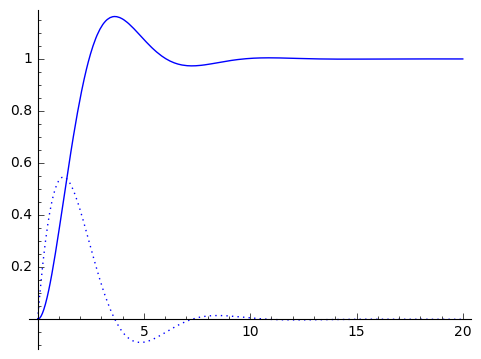

In [2]:
plt_sol1 = plot(sol, [t, 0, 20], linestyle ='-')
plt_sol2 = plot(diff(sol,t), [t, 0, 20], linestyle =':')
(plt_sol1 + plt_sol2).show(figsize=5)

<html>
	<h2>伝達関数H(s)を使った解法</h2>
	<p>
		次に、ラプラス変換と伝達関数を使って同じ微分方程式を解いてみましょう。
$$
		\ddot z + \dot z + z = u(t)
$$
		の両辺をラプラス変換します。zのラブラス変換をZ, uのラブラス変換をUとすると以下の様になります。
$$
		s^2 Z + s Z + Z = U
$$
		ここで伝達関数$H(s) = \frac{Z}{U}$を計算します。
$$
		H(s) = \frac{1}{s^2 + s + 1}
$$
		単位ステップ応答のラブラス変換は、$\frac{1}{s}$なので、$Z(s)$は以下の様に求めまります。
$$
		Z(s) = H(s) U(s) = H(s) \frac{1}{s} = \frac{1}{s^3 + s^2 + s}
$$
		最後に$Z(s)$をラプラス逆変換すると$z(t)$の解析解が求まります。
	</p>
	<p>
		上記の処理をSageを使って行ってみます。
	</p>
</html>

In [3]:
(s, t) = var('s t')
P = 1/(s*s + s + 1)
# 単位ステップ応答は伝達関数/sの逆ラプラス変換で得られる
ip = inverse_laplace(P/s, s, t)
show(ip)

-1/3*(sqrt(3)*sin(1/2*sqrt(3)*t) + 3*cos(1/2*sqrt(3)*t))*e^(-1/2*t) + 1

<html>
	<h3>結果のプロット</h3>
	<p>
		求まった解をプロットするとdesolveの同じ結果と同じ結果を得ることができました。
	</p>
</html>

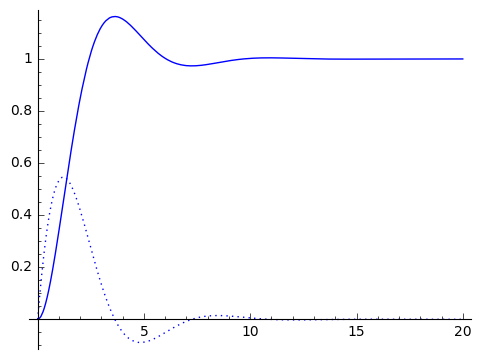

In [4]:
plt_1 = plot(ip, [t, 0, 20], linestyle ='-')
plt_2 = plot(diff(ip,t), [t, 0, 20], linestyle =':')
(plt_1 + plt_2).show(figsize=5)

<html>
	<h2>微分方程式の数値解法</h2>
	<h3>desolve_system_rk4を使った解法</h3>
	<p>
		desolve_system_rk4は、ルンゲクッタ法を使って効率よく微分方程式の数値解をもとめる関数です。
	</p>
	<p>
		例題の微分方程式を$\ddot z, \dot z$について見てみます。
$$
		\ddot z + \dot z + z = u(t)
$$
		以下のような等価な連立微分方式を得ることができます。
$$
		\left\{\begin{array}{l}
			\dot z = \dot z\\
			\ddot z = - z - \dot z + u(t)
			\end{array} \right.
$$
	</p>
	<p>
		これをdesolve_system_rk4関数を使って定義すると以下のようになります。
		初期条件icsは$[ t_0, z(t_0), \dot z(t_0)]$として解きます。
	</p>
</html>

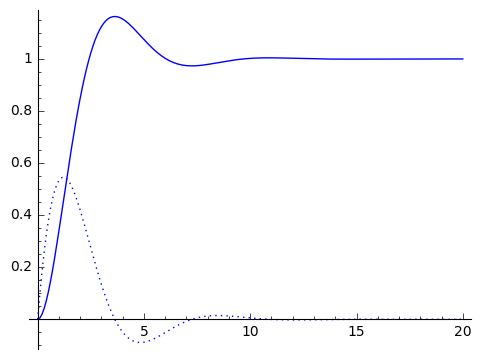

In [5]:
# 連立一次常微分方程式を解く関数desolve_system_rk4を使った例
(z,z_dot,t) = var('z z_dot t')
P=desolve_system_rk4([z_dot,-z - z_dot + 1],[z,z_dot],ics=[0,0,0],ivar=t,end_points=20)
plt_f = list_plot([(i,j) for i, j, k in P], plotjoined=True, linestyle ='-')
plt_g = list_plot([(i,k) for i, j, k in P], plotjoined=True, linestyle =':')
(plt_f+plt_g).show(figsize=5)

<html>
	<h3>連立微分方程式の行列とベクトルを使った表現</h3>
	<p>
		先の連立微分方程式を行列とベクトルで表現すると以下のようになります。
$$
		\left[\begin{array}{c}
			\dot z\\
			\ddot z
			\end{array}\right]
		 = \left[\begin{array}{cc}
				0 & 1\\
				-1 & -1
			\end{array}\right]
			 \left[\begin{array}{c}
				z\\
				\dot z
			\end{array}\right]
		  + \left[\begin{array}{c}
				0\\
				1
				\end{array}\right]
		  u(t), \left[\begin{array}{c}
				z\\
				\dot z
				\end{array}\right]
			 = \left[\begin{array}{c}
				0\\
				0
				\end{array}\right]
		 , u(t) = 1, t \ge 0
$$		
	</p>
	<p>
		ここでベクトル$x(t)$を以下のように定義します。
$$
		x(t) = \left[\begin{array}{c}
				z(t)\\
				\dot z (t)
				\end{array}\right]	
$$		
		$x(t)$で連立微分方程式を表すと以下のように簡単になります。
$$
		\dot x(t) = \left[\begin{array}{cc}
					0 & 1\\
					-1 & -1
					\end{array}\right]
			x(t) + \left[\begin{array}{c}
					0\\
					1
					\end{array}\right]
			u(t), x(0) = \left[\begin{array}{c}
					0\\
					0
					\end{array}\right]
			, u(t) = 1, t \ge 0
$$		
	</p>
</html>

<html>
	<h3>オイラー法を使った解法</h3>
	<p>
		オイラー法は、以下のように行列とベクトルで表現された連立一次常微分方程式を差分近似式を使って解く方法です。
$$
		\dot x(t) = A x(t) + B u(t), x(0) = x_0
$$
		これを差分近似で表現すると以下のようになります。
$$
		x(t +  \Delta t) \simeq x(t) + (A x(t) + B u(t)) \Delta t
$$				
	</p>
	<p>
		それでは、オイラー法を使って先の微分方程式を解いてみましょう。
		A, Bを以下のように定義し、刻み幅$\Delta t$ = 0.05, 終了時刻$t_f$ = 20で計算します。
$$
		A =  \left[\begin{array}{cc}
			0 & 1\\
			-1 & -1
		\end{array}\right]
$$
$$
		B = \left[\begin{array}{c}
			0\\
			1
		\end{array}\right]
$$		
	</p>
</html>

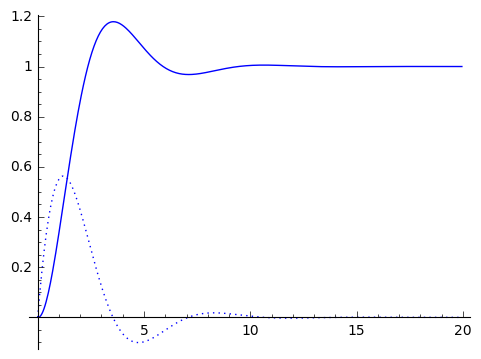

In [6]:
# オイラー法での解法、インタラクティブにdtを変更できるようにした例
from pylab import arange
A = matrix([[0, 1], [-1, -1]])
B = vector([0, 1])
u = 1
tf = 20
dt = 0.05

# 微分方程式をEuler法で解く
x = vector([0, 0])
xx = []
for t in arange(0, tf, dt):
    xx.append(x.list())
    dx = A*x + B*u
    x = x + dx*dt
# 結果をプロット
t = arange(0, tf, dt)
x1_lst = [v[0] for v in xx]
x2_lst = [v[1] for v in xx]
lst_plt1 = list_plot(zip(t, x1_lst), plotjoined=True, linestyle ='-')
lst_plt2 = list_plot(zip(t, x2_lst), plotjoined=True, linestyle =':')
(lst_plt1 + lst_plt2).show(figsize=5)
